In [2]:
import pandas as pd
import numpy as np
import warnings
import scipy
import matplotlib.pyplot as plt
from safeaipackage import check_accuracy, check_robustness, check_explainability
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 10000)

In [9]:
data = pd.read_excel("D:/files/research_activities/ORGANIZED_FILES/safeaipackage/notebooks/employee.xlsx")
print("This dataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
data.head()

This dataset has 473 rows and 9 columns


,salary,age,edu,startsal,jobtime,prevexp,minority,gender,jobcat
0,57000,36,15,27000,98,144,no_min,m,manager
1,40200,30,16,18750,98,36,no_min,m,Clerical
2,21450,59,12,12000,98,381,no_min,f,Clerical
3,21900,41,8,13200,98,190,no_min,f,Clerical
4,45000,33,15,21000,98,138,no_min,m,Clerical


In [10]:
data["gender"] = np.where(data["gender"]=="m", 0, 1)
data["minority"] = np.where(data["minority"]=="no_min", 0, 1)
data = pd.get_dummies(data, columns=["jobcat"])
data.head()

,salary,age,edu,startsal,jobtime,prevexp,minority,gender,jobcat_Clerical,jobcat_Custodial,jobcat_manager
0,57000,36,15,27000,98,144,0,0,0,0,1
1,40200,30,16,18750,98,36,0,0,1,0,0
2,21450,59,12,12000,98,381,0,1,1,0,0
3,21900,41,8,13200,98,190,0,1,1,0,0
4,45000,33,15,21000,98,138,0,0,1,0,0


In [11]:
data["promoted"] = np.where(data["salary"]/data["startsal"] > 2,1,0)

data["promoted"].value_counts()

0    253
1    220
Name: promoted, dtype: int64

In [12]:
X = data.drop(["promoted", "salary", "startsal"], axis=1)
y = data["promoted"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

print(xtrain.shape)
print(xtest.shape)

(331, 9)
(142, 9)


In [13]:
rf_model_full = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)

rf_predictions_full = rf_model_full.predict(xtest)
rf_predictions_full

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

# ACCURACY

## To check accuracy of the model trained to predict if an employee will be promoted or not, we can use the RGA function defined in the "check_accuracy" module of "safeaipackage" python package

In [14]:
#ACCURACY

rga_full = check_accuracy.rga(ytest, rf_predictions_full)
rga_full

0.6848958333333334

### The higher RGA value (closer to one) the better concordance between the trained model and the actual values

# EXPLAINABILITY

# To find the contribution of explanatory variables to the output of the model, we can use the RGE function defined in the "check_explainability" module of "safeaipackage" python package

In [15]:
## Backward removing variables from a full model to see how concordant are the predictions of 
#the full model with the predictions of the reduced model

## Contribution of "prevexp"
X_prevexp = X.drop("prevexp", axis=1)
xtrain_prevexp, xtest_prevexp, ytrain, ytest = train_test_split(X_prevexp, y, test_size=0.3, random_state=1)

rfmodel_prevexp = RandomForestClassifier(random_state=1).fit(xtrain_prevexp, ytrain)
rf_predictions_prevexp = rfmodel_prevexp.predict(xtest_prevexp)

rge_prevexp = check_explainability.rge(rf_predictions_prevexp, rf_predictions_full)
rge_prevexp

0.11964285714285694

In [16]:
## Contribution of "age"

X_age = X.drop("age", axis=1)
xtrain_age, xtest_age, ytrain, ytest = train_test_split(X_age, y, test_size=0.3, random_state=1)

rfmodel_age = RandomForestClassifier(random_state=1).fit(xtrain_age, ytrain)
rf_predictions_age = rfmodel_age.predict(xtest_age)

rge_age = check_explainability.rge(rf_predictions_age, rf_predictions_full)
rge_age

0.18508064516129064

In [17]:
## Contribution of "edu"

X_edu = X.drop("edu", axis=1)
xtrain_edu, xtest_edu, ytrain, ytest = train_test_split(X_edu, y, test_size=0.3, random_state=1)

rfmodel_edu = RandomForestClassifier(random_state=1).fit(xtrain_edu, ytrain)
rf_predictions_edu = rfmodel_edu.predict(xtest_edu)

rge_edu = check_explainability.rge(rf_predictions_edu, rf_predictions_full)
rge_edu

0.10492845786963467

In [18]:
## Contribution of "jobtime"

X_jobtime = X.drop("jobtime", axis=1)
xtrain_jobtime, xtest_jobtime, ytrain, ytest = train_test_split(X_jobtime, y, test_size=0.3, random_state=1)

rfmodel_jobtime = RandomForestClassifier(random_state=1).fit(xtrain_jobtime, ytrain)
rf_predictions_jobtime = rfmodel_jobtime.predict(xtest_jobtime)

rge_jobtime = check_explainability.rge(rf_predictions_jobtime, rf_predictions_full)
rge_jobtime

0.20755475185854955

In [19]:
## Contribution of "gender"

X_gender = X.drop("gender", axis=1)
xtrain_gender, xtest_gender, ytrain, ytest = train_test_split(X_gender, y, test_size=0.3, random_state=1)

rfmodel_gender = RandomForestClassifier(random_state=1).fit(xtrain_gender, ytrain)
rf_predictions_gender = rfmodel_gender.predict(xtest_gender)

rge_gender = check_explainability.rge(rf_predictions_gender, rf_predictions_full)
rge_gender

0.06259936406995215

In [20]:
## Contribution of "minority"

X_minority = X.drop("minority", axis=1)
xtrain_minority, xtest_minority, ytrain, ytest = train_test_split(X_minority, y, test_size=0.3, random_state=1)

rfmodel_minority = RandomForestClassifier(random_state=1).fit(xtrain_minority, ytrain)
rf_predictions_minority = rfmodel_minority.predict(xtest_minority)

rge_minority = check_explainability.rge(rf_predictions_minority, rf_predictions_full)
rge_minority

0.09081875993640665

In [21]:
## Contribution of "jobcat_Clerical"

X_jobcat_Clerical = X.drop("jobcat_Clerical", axis=1)
xtrain_jobcat_Clerical, xtest_jobcat_Clerical, ytrain, ytest = train_test_split(X_jobcat_Clerical, y, test_size=0.3, random_state=1)

rfmodel_jobcat_Clerical = RandomForestClassifier(random_state=1).fit(xtrain_jobcat_Clerical, ytrain)
rf_predictions_jobcat_Clerical = rfmodel_jobcat_Clerical.predict(xtest_jobcat_Clerical)

rge_jobcat_Clerical = check_explainability.rge(rf_predictions_jobcat_Clerical, rf_predictions_full)
rge_jobcat_Clerical

0.09859154929577463

In [22]:
## Contribution of jobcat_Custodial

X_jobcat_Custodial = X.drop("jobcat_Custodial", axis=1)
xtrain_jobcat_Custodial, xtest_jobcat_Custodial, ytrain, ytest = train_test_split(X_jobcat_Custodial, y, test_size=0.3, random_state=1)

rfmodel_jobcat_Custodial = RandomForestClassifier(random_state=1).fit(xtrain_jobcat_Custodial, ytrain)
rf_predictions_jobcat_Custodial = rfmodel_jobcat_Custodial.predict(xtest_jobcat_Custodial)

rge_jobcat_Custodial = check_explainability.rge(rf_predictions_jobcat_Custodial, rf_predictions_full)
rge_jobcat_Custodial

0.055985705777248596

In [23]:
## Contribution of jobcat_manager

X_jobcat_manager = X.drop("jobcat_manager", axis=1)
xtrain_jobcat_manager, xtest_jobcat_manager, ytrain, ytest = train_test_split(X_jobcat_manager, y, test_size=0.3, random_state=1)

rfmodel_jobcat_manager = RandomForestClassifier(random_state=1).fit(xtrain_jobcat_manager, ytrain)
rf_predictions_jobcat_manager = rfmodel_jobcat_manager.predict(xtest_jobcat_manager)

rge_jobcat_manager = check_explainability.rge(rf_predictions_jobcat_manager, rf_predictions_full)
rge_jobcat_manager

0.09570429570429584

In [24]:
rge_values = [rge_age, rge_edu, rge_gender, rge_jobcat_manager, rge_jobcat_Clerical,
                 rge_jobcat_Custodial, rge_jobtime, rge_minority, rge_prevexp]

rge_df = pd.DataFrame(rge_values, index=["age", "edu", "gender", "jobcat_manager", "jobcat_Clerical",
                                   "jobcat_Custodial", "jobtime", "minority", "preexp"], 
             columns=["RGE(yhat_reducedmodel,yhat_fullmodel)"])

rge_df.sort_values(by="RGE(yhat_reducedmodel,yhat_fullmodel)", ascending=True, inplace=True)

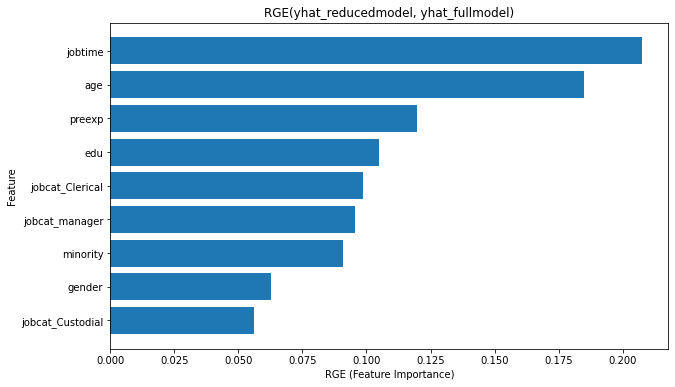

In [25]:
plt.figure(figsize=(10, 6))
plt.barh(rge_df.index, rge_df["RGE(yhat_reducedmodel,yhat_fullmodel)"])
plt.xlabel("RGE (Feature Importance)")
plt.ylabel("Feature")
plt.title("RGE(yhat_reducedmodel, yhat_fullmodel)")
plt.show()

# ROBUSTNESS

In [35]:
features_tobe_perturbed = ['age', 'edu', 'jobtime', 'prevexp', 'minority','gender', 'jobcat_Clerical', 
                           'jobcat_Custodial', 'jobcat_manager']
rgr_values = []
for i in features_tobe_perturbed:
    data_ = data
    rgr_ = []
    for n in range(10):
        data_[i] = np.random.permutation(data_[i])
        X = data_.drop(["promoted"], axis=1)
        y = data_["promoted"]
        xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)
        rf_perturbed = RandomForestClassifier(random_state=1).fit(xtrain, ytrain)
        rf_predictions_perturbed = rf_perturbed.predict(xtest)
        rgr_.append(check_robustness.rgr(rf_predictions_full, rf_predictions_perturbed))
    rgr_values.append(np.mean(rgr_))
pd.DataFrame(rgr_values, index=features_tobe_perturbed, columns=["RGR"])

,RGR
age,0.673239
edu,0.683099
jobtime,0.674648
prevexp,0.678873
minority,0.672535
gender,0.673239
jobcat_Clerical,0.671127
jobcat_Custodial,0.672535
jobcat_manager,0.665493
